# Medición de tiempo con Python

La idea de estos apuntes es presentar medidas de tiempo para varias implementaciones de un mismo algoritmo desde Python y ver como la implementación afecta al rendimiento de este. Como ejemplo se usará una función que calcula la suma de números enteros desde $1$ hasta el número anterior indicado en su argumento.

## Módulo timeit

Se empleará para medir el tiempo. La forma de uso es mucho más complicada que lo que se muestra en los ejemplos, pero se emplea la forma simplificada por fines demostrativos. La función timeit devuelve el tiempo transcurrido luego de ejecutar la función indicada en el primer argumento, la cantidad de veces en su segundo argumento. Por esta razón, para obtener el tiempo promedio transcurrido se dividirá el resultado de `timeit` entre la cantidad de veces.

In [1]:
import timeit

## Implementación while

In [2]:
def sumar_enteros_while(n=1_000_000):
    i = 0
    s = 0
    while (i < n):
        s += i
        i += 1
    return s

In [3]:
timeit.timeit(sumar_enteros_while,number=1)

0.08142906500142999

In [4]:
timeit.timeit(sumar_enteros_while,number=10)/10

0.07311367170041194

In [5]:
timeit.timeit(sumar_enteros_while,number=100)/100

0.06808880497992505

## Implementación for

In [6]:
def sumar_enteros_for(n=1_000_000):
    s = 0
    for i in range(n):
        s += i
    return s

In [7]:
timeit.timeit(sumar_enteros_for,number=1)

0.04683153500081971

In [8]:
timeit.timeit(sumar_enteros_for,number=10)/10

0.042432172999542675

In [9]:
timeit.timeit(sumar_enteros_for,number=100)/100

0.04212897117991815

Se observa que la función que emplea el bucle `for` es ligeramente más rápida que la función implementada con bucle `while`. Esto se debe a que la implementación con bucle `for` está más optimizada a nivel de ensamblador. Como ejemplo, se mostrará como afecta al rendimiento el añadir operaciones "triviales" o innecesarias. 

In [10]:
def sumar_enteros_for_incremento(n=1_000_000):
    s = 0
    c = 0
    for i in range(n):
        s += c
        c += 1
    return s

In [11]:
timeit.timeit(sumar_enteros_for_incremento,number=1)

0.06601966499874834

In [12]:
timeit.timeit(sumar_enteros_for_incremento,number=10)/10

0.061411237499851265

In [13]:
timeit.timeit(sumar_enteros_for_incremento,number=100)/100

0.06498214228005963

Bastó con incluir una operación de incremento para que el tiempo sea relativamente similar a la implementación con bucle `while`. 

In [14]:
def sumar_enteros_for_incremento_comp(n=1_000_000):
    s = 0
    c = 0
    for i in range(n):
        if i < n: 
            pass
        s += c
        c += 1
    return s

In [15]:
timeit.timeit(sumar_enteros_for_incremento_comp,number=1)

0.0875997510011075

In [16]:
timeit.timeit(sumar_enteros_for_incremento_comp,number=10)/10

0.07845941169944126

In [17]:
timeit.timeit(sumar_enteros_for_incremento_comp,number=100)/100

0.08013929420005297

Al añadir la operación de comparación la función ahora es incluso más lenta. Se debe tener en cuenta estos detalles para implementar funciones. Un camino alternativo, es emplear las funciones internas que proporciona el lenguaje.

## Con funciones internas

In [18]:
def sumar_enteros_idiomatic(n=1_000_000):
    return sum(range(n))

In [19]:
timeit.timeit(sumar_enteros_idiomatic,number=1)

0.013898854012950324

In [20]:
timeit.timeit(sumar_enteros_idiomatic,number=10)/10

0.01365087960002711

In [21]:
timeit.timeit(sumar_enteros_idiomatic,number=100)/100

0.01261682878001011

Se observa que las funciones internas de Python ya están muy optimizadas y lo recomendable es emplearlas si están disponibles.

## Consideraciones sobre las mediciones del tiempo

Como se mencionó el módulo `timeit` proporciona el tiempo acumulado. A continuación mediante el uso de gráficas se presentará con más detalle lo que ocurre con estas mediciones.

In [22]:
import matplotlib.pyplot as plt

In [23]:
timeits = []
t = 0
for i in range(100):
    t = timeit.timeit(sumar_enteros_while,number=1)
    timeits.append(t)

In [24]:
x = list(range(len(timeits)))

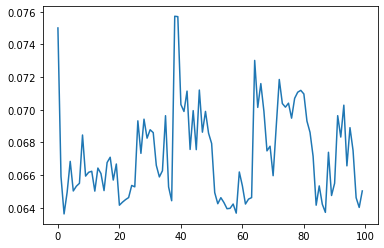

In [25]:
plt.plot(x,timeits)

Como se observa, las mediciones son irregulares y presentan picos. Una posibilidad es que el medidor de tiempo empleado es sensible al ruido. Por esto se empleará otro medidor de tiempo para ver que ocurre.

In [26]:
import time

In [27]:
times = []
tic = 0
toc = 0
e = 0
for i in range(100):
    tic = time.time()
    sumar_enteros_while()
    toc = time.time()
    e = toc - tic
    times.append(e)

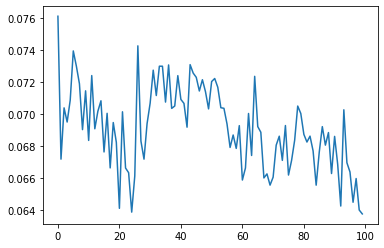

In [28]:
plt.plot(x,times)

Un gráfico conjunto de las dos formas de medir el tiempo

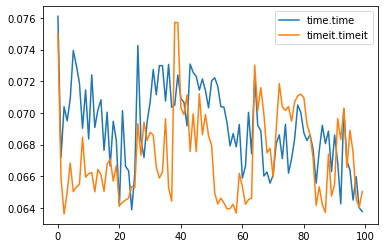

In [29]:
# gráfico con leyenda
plt.plot(x,times, label='time.time')
plt.plot(x,timeits, label='timeit.timeit')
# para mostrar la leyenda
plt.legend()

Se observa que ambas mediciones de tiempo son irregulares, es decir, ambas mediciones presentan ruido. Sumar el ruido que se ha introducido en nuestras mediciones y luego promediar implicaría que estamos promediando el ruido y esto desviaría el resultado final de lo real. ¿Cómo medir esta distorsión? ¿Cómo eliminar el ruido?

## Filtro mediana unidimensional

El filtro de mediana es un algoritmo empleado para eliminar ruido.

In [30]:
import statistics

In [31]:
timeitsn = []
ventana = 9
offs = int((ventana-1)/2)
for i in range(len(timeits)):
    inicio = i - offs if (i - offs > 0) else i
    fin = i + offs if (i + offs < len(timeits)) else len(timeits)
    timeitsn.append(statistics.median(timeits[inicio:fin]))

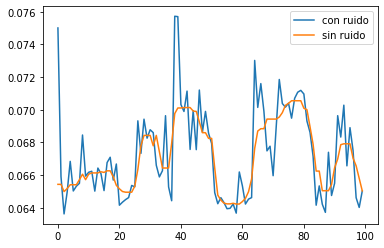

In [32]:
# gráfico con leyenda
plt.plot(x,timeits, label='con ruido')
plt.plot(x,timeitsn, label='sin ruido')
# para mostrar la leyenda
plt.legend()

Se observa en la gráfica, una vez aplicado el filtro a las mediciones, la tendencia es más regular.

<BarContainer object of 2 artists>

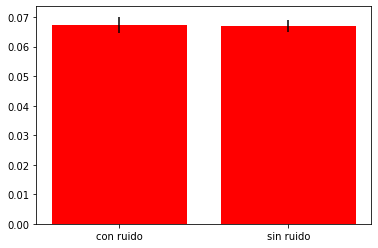

In [33]:
yerrs = [statistics.stdev(timeits, statistics.mean(timeits)), statistics.stdev(timeitsn, statistics.mean(timeitsn))]
proms = [statistics.mean(timeits), statistics.mean(timeitsn)]
noms = ['con ruido', 'sin ruido']
# gráfico de barras
plt.bar(noms,proms,color='r',yerr=yerrs)

In [34]:
proms

[0.06734604286990362, 0.06713174850439828]

Se observa que a pesar de que la señal presenta ruido, este no parece afectar en el cálculo final del tiempo promedio. Ahora se analizará el caso de la función `time`.

In [35]:
timesn = []
ventana = 9
offs = int((ventana-1)/2)
for i in range(len(times)):
    inicio = i - offs if (i - offs > 0) else i
    fin = i + offs if (i + offs < len(times)) else len(times)
    timesn.append(statistics.median(times[inicio:fin]))

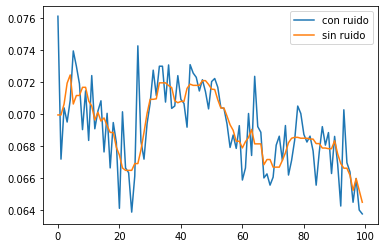

In [36]:
# gráfico con leyenda
plt.plot(x,times, label='con ruido')
plt.plot(x,timesn, label='sin ruido')
# para mostrar la leyenda
plt.legend()

<BarContainer object of 2 artists>

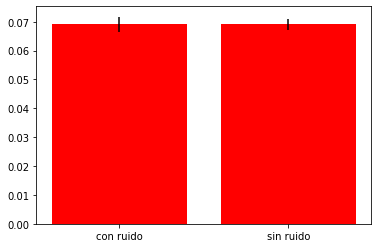

In [37]:
yerrs = [statistics.stdev(times, statistics.mean(times)), statistics.stdev(timesn, statistics.mean(timesn))]
proms = [statistics.mean(times), statistics.mean(timesn)]
noms = ['con ruido', 'sin ruido']
# gráfico de barras
plt.bar(noms,proms,color='r',yerr=yerrs)

In [38]:
proms

[0.06914135456085205, 0.06911188125610351]

¿Fueron significativas las distorsiones introducidas en las mediciones? ¿Cuál es la diferencia entre el promedio con ruido y sin ruido? Se deja estas preguntas para su reflexión.

## Comparación de las funciones implementadas

Se definen funciones con lo aprendido para poder usarlo de forma modular

In [39]:
def medir_timeit(f,veces):
    timeits = []
    t = 0
    for i in range(veces):
        t = timeit.timeit(f,number=1)
        timeits.append(t)
    return timeits

In [40]:
def medir_time(f,veces):
    times = []
    tic = 0
    toc = 0
    e = 0
    for i in range(veces):
        tic = time.time()
        f()
        toc = time.time()
        e = toc - tic
        times.append(e)
    return times

In [41]:
def filtro_mediana(sign, ventana):
    signc = []
    tam = len(sign)
    offs = int((ventana-1)/2)
    for i in range(tam):
        inicio = i - offs if (i - offs > 0) else i
        fin = i + offs if (i + offs < tam) else tam
        signc.append(statistics.median(sign[inicio:fin]))
    return signc

Mediciones con timeit

In [42]:
t1 = medir_timeit(sumar_enteros_while,100)

In [43]:
t2 = medir_timeit(sumar_enteros_for,100)

In [44]:
t3 = medir_timeit(sumar_enteros_for_incremento,100)

In [45]:
t4 = medir_timeit(sumar_enteros_for_incremento_comp,100)

In [46]:
t5 = medir_timeit(sumar_enteros_idiomatic,100)

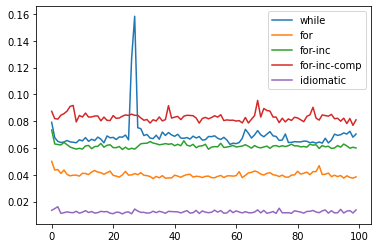

In [47]:
x = range(len(t1))
plt.plot(x,t1, label='while')
plt.plot(x,t2, label='for')
plt.plot(x,t3, label='for-inc')
plt.plot(x,t4, label='for-inc-comp')
plt.plot(x,t5, label='idiomatic')
# para mostrar la leyenda
plt.legend()

Luego de pasar filtro mediano a las mediciones

In [48]:
t1c = filtro_mediana(t1, 7)

In [49]:
t2c = filtro_mediana(t2, 7)

In [50]:
t3c = filtro_mediana(t3, 7)

In [51]:
t4c = filtro_mediana(t4, 7)

In [52]:
t5c = filtro_mediana(t5, 7)

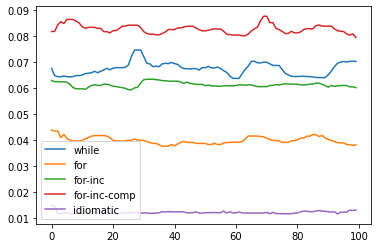

In [53]:
plt.plot(x,t1c, label='while')
plt.plot(x,t2c, label='for')
plt.plot(x,t3c, label='for-inc')
plt.plot(x,t4c, label='for-inc-comp')
plt.plot(x,t5c, label='idiomatic')
# para mostrar la leyenda
plt.legend()

Mediciones con time

In [54]:
r1 = medir_time(sumar_enteros_while,100)

In [55]:
r2 = medir_time(sumar_enteros_for,100)

In [56]:
r3 = medir_time(sumar_enteros_for_incremento,100)

In [57]:
r4 = medir_time(sumar_enteros_for_incremento_comp,100)

In [58]:
r5 = medir_time(sumar_enteros_idiomatic,100)

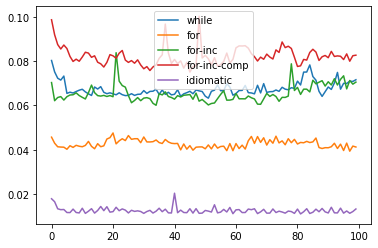

In [59]:
plt.plot(x,r1, label='while')
plt.plot(x,r2, label='for')
plt.plot(x,r3, label='for-inc')
plt.plot(x,r4, label='for-inc-comp')
plt.plot(x,r5, label='idiomatic')
# para mostrar la leyenda
plt.legend()

Luego de pasar filtro mediano a las mediciones

In [60]:
r1c = filtro_mediana(r1, 7)

In [61]:
r2c = filtro_mediana(r2, 7)

In [62]:
r3c = filtro_mediana(r3, 7)

In [63]:
r4c = filtro_mediana(r4, 7)

In [64]:
r5c = filtro_mediana(r5, 7)

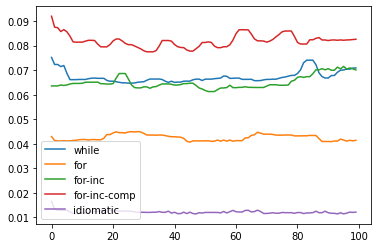

In [65]:
plt.plot(x,r1c, label='while')
plt.plot(x,r2c, label='for')
plt.plot(x,r3c, label='for-inc')
plt.plot(x,r4c, label='for-inc-comp')
plt.plot(x,r5c, label='idiomatic')
# para mostrar la leyenda
plt.legend()

Gráficos de barras

In [66]:
# errores en cada medición
errs = [
    statistics.stdev(t1c, statistics.mean(t1c)),
    statistics.stdev(t2c, statistics.mean(t2c)),
    statistics.stdev(t3c, statistics.mean(t3c)),
    statistics.stdev(t4c, statistics.mean(t4c)),
    statistics.stdev(t5c, statistics.mean(t5c))
]

<BarContainer object of 5 artists>

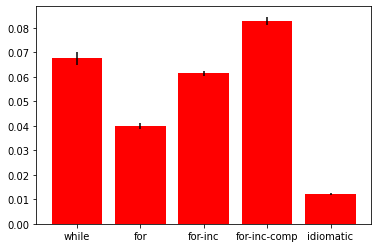

In [67]:
x = ['while','for','for-inc','for-inc-comp','idiomatic']
# promedios
proms = [
    statistics.mean(t1c),
    statistics.mean(t2c),
    statistics.mean(t3c),
    statistics.mean(t4c),
    statistics.mean(t5c)
]
# gráfico de barras
plt.bar(x,proms,color='r',yerr=errs)

In [68]:
# errores en cada medición
errs = [
    statistics.stdev(r1c, statistics.mean(r1c)),
    statistics.stdev(r2c, statistics.mean(r2c)),
    statistics.stdev(r3c, statistics.mean(r3c)),
    statistics.stdev(r4c, statistics.mean(r4c)),
    statistics.stdev(r5c, statistics.mean(r5c))
]

<BarContainer object of 5 artists>

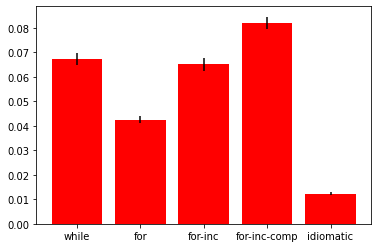

In [69]:
# promedios
proms = [
    statistics.mean(r1c),
    statistics.mean(r2c),
    statistics.mean(r3c),
    statistics.mean(r4c),
    statistics.mean(r5c)
]
# gráfico de barras
plt.bar(x,proms,color='r',yerr=errs)

Los resultados fueron obtenidos al ejecutar el cuaderno en una máquina virtual con cuatro núcleos y 4GB de RAM. Por esta razón, usted podría obtener resultados muy diferentes al ejecutarlo en su equipo.